In [1]:
# 1.0 Initialize


# 1.1 Import statements 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.2 Read data set
data = pd.read_csv('../Datasets/UCI-heart-disease.csv')
df = pd.DataFrame(data)

In [2]:
# 2.0 Data Information

In [3]:
# 2.1 Top 5 rows of the table
df.head()

,age,sex,cp,trestbps,chol,thalach,exang,target
0,63,1,3,145,233,150,0,1
1,37,1,2,130,250,187,0,1
2,41,0,1,130,204,172,0,1
3,56,1,1,120,236,178,0,1
4,57,0,0,120,354,163,1,1


In [4]:
# 2.2 Bottom 5 rows of the table
df.tail()

,age,sex,cp,trestbps,chol,thalach,exang,target
298,57,0,0,140,241,123,1,0
299,45,1,3,110,264,132,0,0
300,68,1,0,144,193,141,0,0
301,57,1,0,130,131,115,1,0
302,57,0,1,130,236,174,0,0


In [5]:
# 2.3 Table information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trestbps  303 non-null    int64
 4   chol      303 non-null    int64
 5   thalach   303 non-null    int64
 6   exang     303 non-null    int64
 7   target    303 non-null    int64
dtypes: int64(8)
memory usage: 19.1 KB


In [6]:
# 3.0 Data Cleaning Process

In [7]:
# 3.1 Verfify that all the table contents are unique

df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
thalach      91
exang         2
target        2
dtype: int64

In [8]:
# 3.2 Sex should only have 2 unique values
df['sex'].unique()

array([1, 0], dtype=int64)

In [9]:
# 3.3 Chest pain should only have 4 unique values
df['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [10]:
# 3.4 Excercise Induced Angina should only have 2 unique value
df['exang'].unique()

array([0, 1], dtype=int64)

In [11]:
# 3.5 Target should only have 2 unique value
df['target'].unique()

array([1, 0], dtype=int64)

In [12]:
# 3.6 Check for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
thalach     0
exang       0
target      0
dtype: int64

In [13]:
# 3.7 Check for duplicate rows
df.duplicated().sum()

1

In [14]:
# 3.8 Remove the one duplicate row and verify that it has been removed
df.drop_duplicates(keep=False,inplace=True)
df.count()

age         301
sex         301
cp          301
trestbps    301
chol        301
thalach     301
exang       301
target      301
dtype: int64

In [15]:
# 4.0 Table Statisctics
df.describe()

,age,sex,cp,trestbps,chol,thalach,exang,target
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,54.475083,0.681063,0.960133,131.581395,246.737542,149.491694,0.328904,0.541528
std,9.013150,0.466841,1.032023,17.588752,51.674503,22.901618,0.470597,0.499102
min,29.000000,0.000000,0.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,133.000000,0.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,241.000000,152.000000,0.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,166.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,202.000000,1.000000,1.000000


In [16]:
# 5.0 Rename labels for better visulization

# 5.1 Rename sex
df['sex'] = df.sex.replace({1: "Male", 0: "Female"})

# 5.2 Rename chest pain
df['cp'] = df.cp.replace({0: "Typical Angina", 1: "Atypical Angina", 2: "Non-Anginal Pain", 3: "Asymptomatic"})

# 5.3 Rename excercise induced angina
df['exang'] = df.exang.replace({1: "Yes", 0: "No"})

# 5.4 Rename heart disease
df['target'] = df.target.replace({1: "Heart Disease", 0: "No Heart Disease"})

# 5.5 Display the update table
df.head()

,age,sex,cp,trestbps,chol,thalach,exang,target
0,63,Male,Asymptomatic,145,233,150,No,Heart Disease
1,37,Male,Non-Anginal Pain,130,250,187,No,Heart Disease
2,41,Female,Atypical Angina,130,204,172,No,Heart Disease
3,56,Male,Atypical Angina,120,236,178,No,Heart Disease
4,57,Female,Typical Angina,120,354,163,Yes,Heart Disease


In [17]:
# 6.0 Outliners

<AxesSubplot:xlabel='target', ylabel='trestbps'>

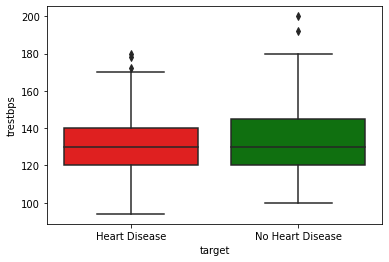

In [18]:
# 6.1 target and rest blood pressure
sns.boxplot(x='target', y='trestbps', data=df, palette=('red','green'))

<AxesSubplot:xlabel='target', ylabel='age'>

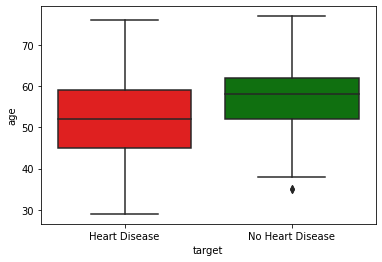

In [19]:
# 6.2 target and age
sns.boxplot(x='target', y='age', data=df, palette=('red','green'))

<AxesSubplot:xlabel='target', ylabel='thalach'>

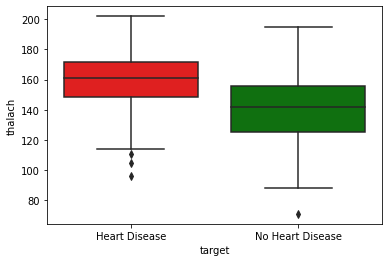

In [20]:
# 6.3 target and maximum and heart rate received
sns.boxplot(x='target', y='thalach', data=df, palette=('red','green'))

In [21]:
# 7.0 Visualizing data

Text(0.5, 1.0, 'Age Distribution')

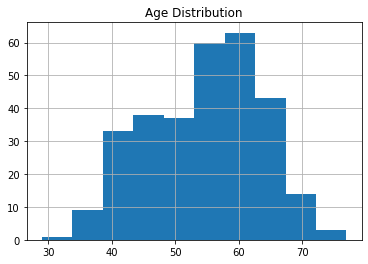

In [22]:
# 7.1 Age Distribution
df['age'].hist().plot()
plt.title("Age Distribution")

Text(0.5, 1.0, 'Resting Blood Pressure (mm Hg) Distribution')

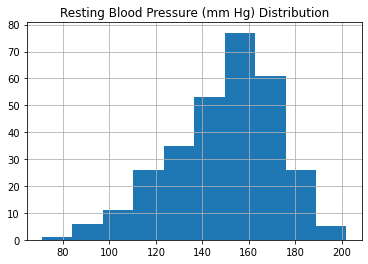

In [23]:
# 7.2 Resting Blood Pressure (mm Hg) Distribution
df['thalach'].hist().plot()
plt.title("Resting Blood Pressure (mm Hg) Distribution")

Text(0.5, 1.0, 'Serum Cholestoral (mg/dl) Distribution')

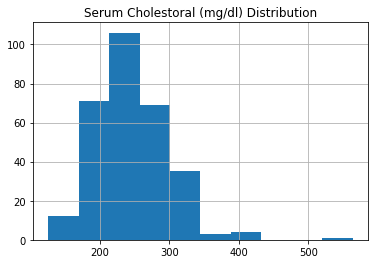

In [24]:
# 7.3 Serum Cholestoral (mg/dl) Distribution
df['chol'].hist().plot()
plt.title("Serum Cholestoral (mg/dl) Distribution")

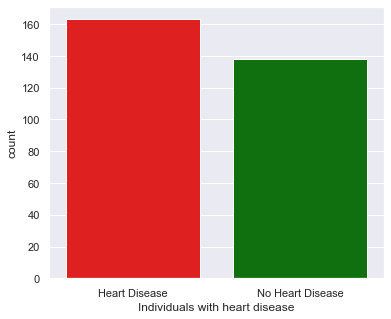

In [25]:
# 7.4 Heart Disease vs No heart Disease plot
plt.figure(figsize=(6,5)) 
sns.set_theme(style="darkgrid")
sns.countplot(x="target", data=df, palette=('red','green'))
plt.xlabel("Individuals with heart disease")
plt.show()

<AxesSubplot:xlabel='sex', ylabel='count'>

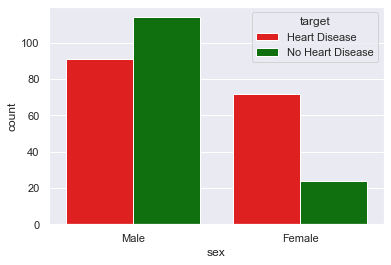

In [26]:
# 7.5 Sex distribution to heart disease
sns.countplot(x='sex', hue='target', data=df, palette=('red','green'))

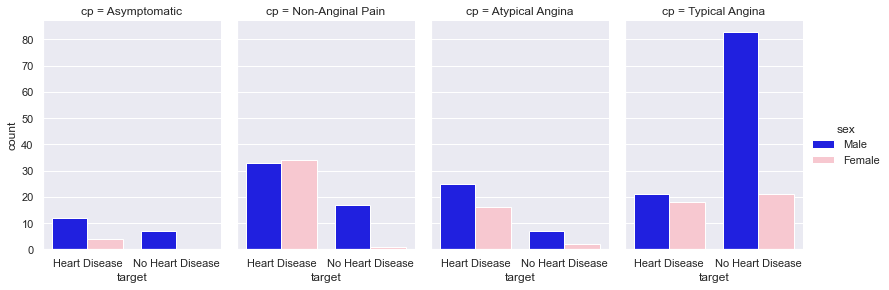

In [27]:
# 7.6 Sex distribution to heart disease per chest pain
sns.catplot(x="target", hue="sex", col="cp",
                data=df, kind="count",
                height=4, aspect=.7, palette=('blue','pink'))

Text(0, 0.5, 'Age')

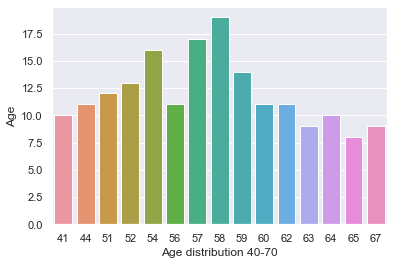

In [28]:
# 7.7 Heart Disease age distribution top 15 age categories
x = df.age.value_counts()[:15]
y = df.age.value_counts()[:15]
sns.barplot(x=x.index, y=y.values)
plt.xlabel('Age distribution 40-70')
plt.ylabel('Age')

<AxesSubplot:xlabel='exang', ylabel='count'>

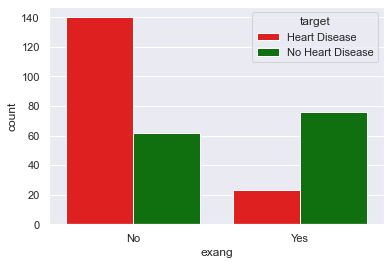

In [29]:
# 7.8 Exercise Induced Angina distribution count related to target 
sns.countplot(x='exang', hue='target', data=df, palette=('red','green'))

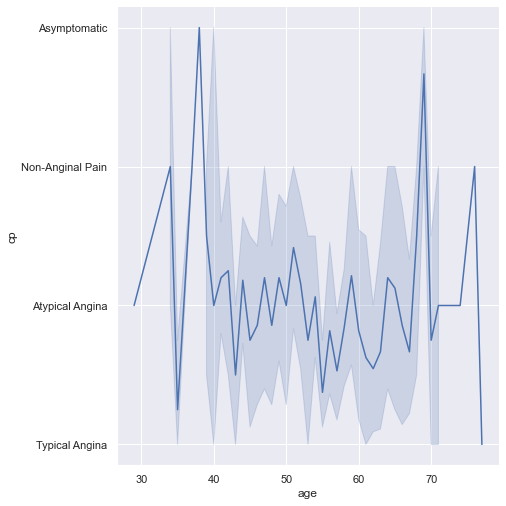

In [30]:
# 7.9 Chest pain types to age distribution (increasing)
sns.relplot(
    data=df, x="age", y="cp",
    kind="line", height=7
)